# Lista 5 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

K-médias e PCA
    
## 1)  K-médias




- Carregue os dados contidos no arquivo ex5data1.data. O arquivo contém uma matriz de dados.
  Esta matriz é composta de 150 linhas e 5 colunas. As 4 primeiras colunas representam 4 atributos e a coluna 5 representa a classe a qual pertence o exemplo. Nestes dados, existem 3 classes, sendo 50 exemplos de cada classe.
  Os dados pertencem a um problema de reconhecimento flores (íris dataset). Os 4 atributos são tamanho e espessura da sépala e da pétala de cada flor. As três classes referem-se as flores 1-setosa, 2- versicolor e 3-virginica.
- Implemente o k-médias para a base de dados, utilizando somente os 4 primeiros atributos.
- Varie o número de clusters entre 2 e 5
- Calcule o somatório dos erros quadráticos em relação aos centroides para cada número de agrupamentos.
  - **Apresentar**: Gráfico do erro pelo número de agrupamentos
  - **Apresentar**: O número de agrupamentos para este problema, de acordo com a heurística apresentada em aula
  - **Comentários**: Comente sobre o número de classes obtido
  - Execute o K-médias para o número de agrupamentos obtidos
  - Compare o resultado com o valor real das classes
  - **Comentários**: Comente sobre o resultado obtido

### Carregando os dados:

In [54]:
import numpy as np
import pandas as pd

attributes = ['X1', 'X2', 'X3', 'X4', 'Y']
df = pd.read_csv('ex5data1.data', names=attributes);

### Normalizando os dados:

In [55]:
df_inputs = df[attributes[:-1]]
df_inputs_norm = df_inputs.apply(lambda series: (series - series.mean())/series.std(ddof=0))
df_inputs_norm['Y'] = df['Y']
data = df_inputs_norm[attributes[:-1]].values

### Implementando o k-médias:

In [56]:
class KMeans:
    
    def __init__(self, k):
        self.k = k
        self.means = None            
        
    def classify(self, point):
        return min(range(self.k), key=lambda i: np.linalg.norm(point - self.means[i]))
    
    def train(self, data):
        n_rows = data.shape[0]
        idx = np.random.randint(n_rows, size=self.k)
        self.means = data[idx,:]
        
        assignments = None
        
        while True:
            
            new_assignments = map(self.classify, data)
            
            if assignments == new_assignments:
                return
            
            assignments = new_assignments
            
            d = {i:[] for i in range(self.k)}
            
            for record in data:
                d[self.classify(record)].append(record)
                
            for key, values in d.items():
                array = np.asarray(values)
                if (array.size > 0):
                    self.means[key] = array.mean(axis=0)
                
    def error(self, data):
        classified_data = zip(map(self.classify, data), data)
        error = map(lambda i: np.linalg.norm(i[1] - self.means[i[0]]), classified_data)
        return np.asarray(error).sum()

### Gráfico do erro pelo número de agrupamentos:

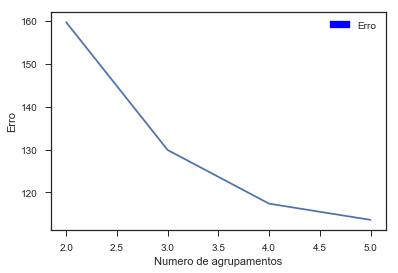

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 5
errors = []
for i in range(2,n+1):
    clf_t = KMeans(i)
    clf_t.train(data)
    errors.append(clf_t.error(data))
    
blue_patch = mpatches.Patch(color='blue', label='Erro')
plt.legend(handles=[blue_patch])
    
plt.plot(range(2,n+1), errors)
plt.xlabel("Numero de agrupamentos")
plt.ylabel("Erro")
plt.show()

### Escolhendo o número de agrupamentos:
 Uma possível heurística para escolher o melhor k é pegar o número de agrupamentos a partir do qual o erro passa a diminuir menos acentuadamente, ou seja, o "joelho" do gráfico. Observando o gráfico acima podemos concluir que um bom número de agrupamentos seria 3.

### Comentário sobre o número de classes ecolhidas:

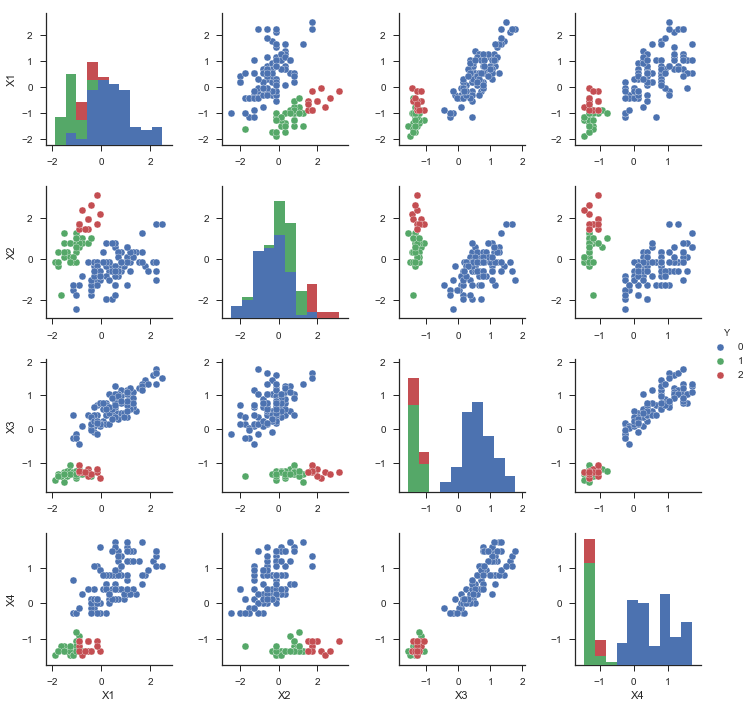

In [58]:
import seaborn as sns

num_of_classes = 3
clf = KMeans(num_of_classes)
clf.train(data)
test = df_inputs_norm[attributes[:-1]]
test['Y'] = pd.Series(map(clf.classify, test.values))

sns.pairplot(test, hue='Y', vars = attributes[:-1])
plt.show()

Analisando a matriz de espalhamento acima vemos que uma das classes é visivelmente separável das outras. As duas classes restantes esão mais próximas uma da outra e portando são mais difíceis de separar, mesmo assim é possível perceber uma tendencia de separação.

### Comparando com as classes originais:

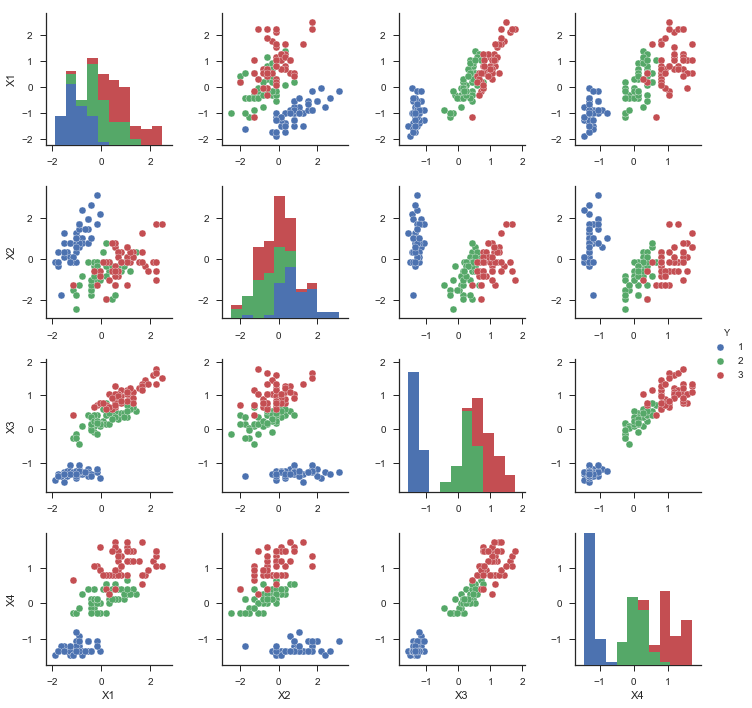

In [59]:
sns.set(style="ticks")
sns.pairplot(df_inputs_norm, hue='Y', vars = attributes[:-1])
plt.show()